# Program zum erstellen der Balkenplots
### Waldbroschüre Abbildung 1

Mit diesem Programm wurden die Balkenplots erstellt, die in der Waldbroschüre in Abbildung 1 zusehen 
sind.
Die Farbskala beruht auf der Graphik Idee von Ed Hawkins von der Universität Reading.
Die Datengrundlage ist der E-OBS Beobachtungsdatensatz.
E-OBS Datensatz von dem EU-FP6 Projekt UERRA und dem Copernicus Climate Change Service, und Datenanbieter innerhalb des ECA&D Projekts)

**Katharina Bülow**, Climate Service Center Germany (GERICS), Helmholtz-Zentrum hereon GmbH, Email: katharina.buelow@hereon.de

In [8]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colormaps
from matplotlib.colors import ListedColormap

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Region wählen:

region = "08212_08215_07334_Region_um_Karlsruhe"
ort = "Karlsruhe"

In [26]:
# organising some directories and output files

workdir = os.getcwd()
datadir=workdir.split('Notebooks')[0]

filenameT = "input_data/eobs/year/TG/climdexEOBS_TG_year_weighted_means.csv"
filenameNS = "input_data/eobs/year/RRm/climdexEOBS_RRm_year_weighted_means.csv"
inputT = os.path.join(datadir, filenameT)
inputNS = os.path.join(datadir, filenameNS)
plotdir = "EOBS-Plots"
outdir = os.path.join(workdir.replace("EOBS", plotdir))
if not os.path.exists(outdir):
    os.makedirs(outdir)

plotname = "EOBS_Annual_anomaly_deviation_to_1971_2000_" + region + "_nc.png"
figure = os.path.join(outdir, plotname)

In [27]:
def select_region(df, region):
    return df.loc[(df["region"].isin([region]))]

In [28]:
def deviation(df, variable):
    df["time"] = pd.to_datetime(df["time"])
    df_ = df.copy()
    start = "1971-01-01"
    end = "2000-12-31"

    mask = (df_["time"] >= start) & (df_["time"] <= end)

    df_new = df_[mask]
    hist = df_new["value"].mean()
    # print(hist)
    if variable != "precipitation":
        # print(df['value']-hist)
        df["Temperature anomaly [°C]"] = df["value"] - hist
    else:
        df["Precipitation anomaly [mm]"] = df["value"] - hist
        df["Precipitation change [%]"] = ((df["value"] - hist) / hist) * 100

    # just nice to have for plotting:
    df["year"] = pd.DatetimeIndex(df["time"]).year

    return df

In [29]:
dfT = pd.read_csv(inputT)
dfTr = select_region(dfT, region)
dfTn = deviation(dfTr, "temperature")

dfNS = pd.read_csv(inputNS)
dfNSr = select_region(dfNS, region)
dfNSn = deviation(dfNSr, "precipitation")

In [30]:
cmap = ListedColormap(
    [
        "#08306b",
        "#08519c",
        "#2171b5",
        "#4292c6",
        "#6baed6",
        "#9ecae1",
        "#c6dbef",
        "#deebf7",
        "#fee0d2",
        "#fcbba1",
        "#fc9272",
        "#fb6a4a",
        "#ef3b2c",
        "#cb181d",
        "#a50f15",
        "#67000d",
    ]
)

# linearly normalizes data into the [0.0, 1.0] interval
norm = mpl.colors.Normalize(
    dfTn["Temperature anomaly [°C]"].min(), dfTn["Temperature anomaly [°C]"].max()
)
norm2 = mpl.colors.Normalize(
    dfNSn["Precipitation change [%]"].min(), dfNSn["Precipitation change [%]"].max()
)

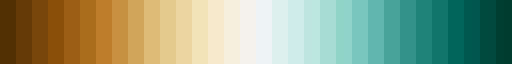

In [31]:
# https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html
BrBG = mpl.colormaps["BrBG"].resampled(32)
BrBG
# other useful colormaps
# viridis, Spectral
# colormaps
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
# colors
# https://matplotlib.org/2.1.1/gallery/color/named_colors.html

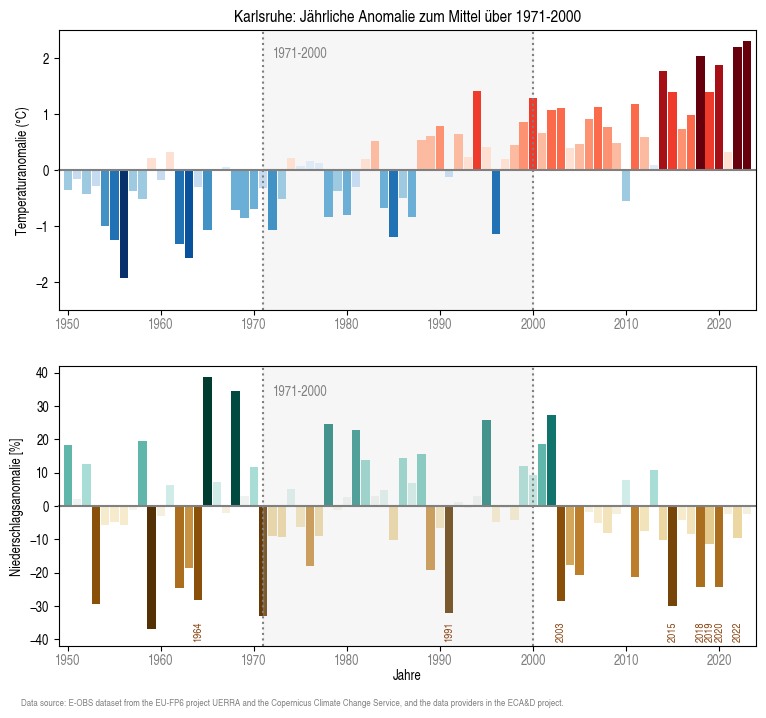

In [32]:
# import matplotlib.font_manager
# plt.rcParams["font.family"] = "Arial"

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8), sharex=True)
plt.rcParams["font.family"] = "Nimbus Sans Narrow"
# Plot bars
ax1.bar(
    dfTn["year"],
    dfTn["Temperature anomaly [°C]"],
    color=cmap(norm(dfTn["Temperature anomaly [°C]"])),
    width=0.9,
    zorder=2,
    # alpha=0.9
)

ax1.set_ylabel("Temperaturanomalie (°C)")
ax1.set_title(ort + ": Jährliche Anomalie zum Mittel über 1971-2000")
ax1.set_xlabel("", fontsize=12, labelpad=10)
ax1.xaxis.set_tick_params(
    pad=2,
    labelbottom=True,
    bottom=True,
    labelsize=10,
    labelrotation=0,
    labelcolor="grey",
)
ax1.set_xlim([dfTn["year"].min() - 1, dfTn["year"].max() + 1])
ax1.set_ylim(-2.5, 2.5)

ax1.axhline(0, color="grey", clip_on=False)
ax1.axvspan(1971, 2000, alpha=0.2, color="lightgrey")
ax1.axvline(1971, color="grey", linestyle=":", clip_on=False)
ax1.axvline(2000, color="grey", linestyle=":", clip_on=False)
ax1.text(1972, 2, "1971-2000", size=10, color="grey")
# ax1.grid(True)

# Niederschlag
ax2.bar(
    dfNSn["year"],
    dfNSn["Precipitation change [%]"],
    color=BrBG(norm2(dfNSn["Precipitation change [%]"])),
    # alpha=0.9,
    width=0.9,
)
ax2.set_ylabel("Niederschlagsanomalie [%]")
ax2.axvspan(1971, 2000, alpha=0.2, color="lightgrey")
ax2.set_xlabel("Jahre", fontsize=10, labelpad=1)
ax2.xaxis.set_tick_params(
    pad=2,
    labelbottom=True,
    bottom=True,
    labelsize=10,
    labelrotation=0,
    labelcolor="grey",
)

ax2.set_xlim([dfNSn["year"].min() - 1, dfNSn["year"].max() + 1])
ax2.set_ylim(-42, 42)
ax2.axhline(0, color="grey", clip_on=False)

ax2.axvline(1971, color="grey", linestyle=":", clip_on=False)
ax2.axvline(2000, color="grey", linestyle=":", clip_on=False)
ax2.text(1972, 33, "1971-2000", size=10, color="grey")

# ax2.grid(True)
# Dürre Jahre:
# In Southwestern Germany (Erfurt et al. 2018):
# According to these criteria, the following drought event years were identified:
# 1832, 1834, 1842, 1865, 1884, 1887, 1911, 1919, 1921,
# 1923, 1928, 1947, 1949, 1964, 1991, 2003, 2015 and 2018.
# Und 2018-2020 sowie 2022 findet man eigentlich in jedem Paper. Z.B.
# hier: https://egusphere.copernicus.org/preprints/2023/egusphere-2023-1463/ (von uns)
# Oder hier: https://bg.copernicus.org/articles/20/1155/2023/
# Oder du gehst auf den Dürremonitor? Siehe Bild. https://www.ufz.de/index.php?de=47252

ax2.text(1963.5, -40, "1964", size=8, color="saddlebrown", rotation=90)
ax2.text(1990.5, -40, "1991", size=8, color="saddlebrown", rotation=90)
ax2.text(2002.5, -40, "2003", size=8, color="saddlebrown", rotation=90)
ax2.text(2014.5, -40, "2015", size=8, color="saddlebrown", rotation=90)
ax2.text(2017.5, -40, "2018", size=8, color="saddlebrown", rotation=90)
ax2.text(2018.5, -40, "2019", size=8, color="saddlebrown", rotation=90)
ax2.text(2019.5, -40, "2020", size=8, color="saddlebrown", rotation=90)
ax2.text(2021.5, -40, "2022", size=8, color="saddlebrown", rotation=90)

ax2.text(
    1945,
    -60,
    "Data source: E-OBS dataset from the EU-FP6 project UERRA and the Copernicus Climate Change Service, and the data providers in the ECA&D project.",
    size=7,
    color="grey",
)
# plt.show()
plt.savefig(figure, dpi=300, bbox_inches="tight")